In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import contextily as cx
import os
import seaborn as sns
import shapely as shp

In [42]:
for csv_file in os.listdir("./data_clean"):
    if csv_file[-3:] == "csv":
        globals()[csv_file[:-4]] = pd.read_csv("./data_clean/" + csv_file)

# Anayse des commandes

In [43]:
volumes = pd.merge(orders, cities, right_on="city", left_on="delivery_location")[["city", "package_volume", "order_date"]].groupby(["city", "order_date"]).agg("sum").reset_index().groupby("city").agg("mean").reset_index()
cities = pd.merge(cities, volumes, on="city")

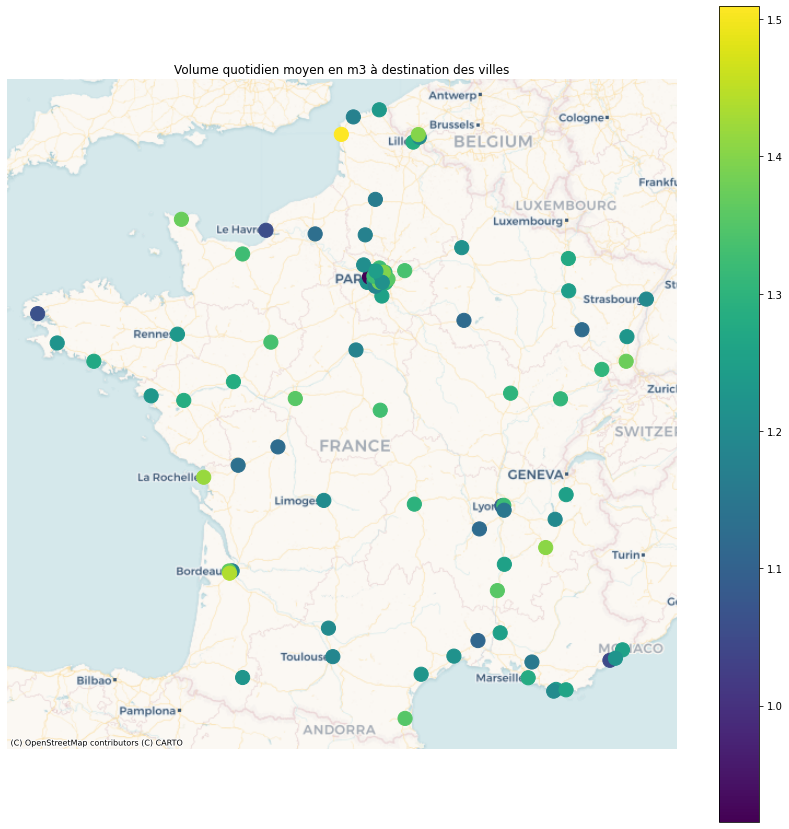

In [46]:
fig, ax = plt.subplots(figsize=(15, 15))
gdf = gpd.GeoDataFrame(cities, geometry=gpd.points_from_xy(cities.lng, cities.lat), crs=4326)
gdf.to_crs(epsg=3857).plot(ax=ax, column="package_volume", legend=True, markersize=200)
cx.add_basemap(ax, source=cx.providers.CartoDB.Voyager, zoom=6)
ax.axis('off')
ax.set_title("Volume quotidien moyen en m3 à destination des villes")
plt.show()

In [53]:
orders["order_date"] = pd.to_datetime(orders["order_date"])

In [55]:
orders_number = orders[["order_date", "order_id", "from_warehouse"]].groupby(["order_date", "from_warehouse"]).agg("count")

Text(0.5, 1.0, 'Evolution temporelle du nombre de commande pour chaque entrepôt')

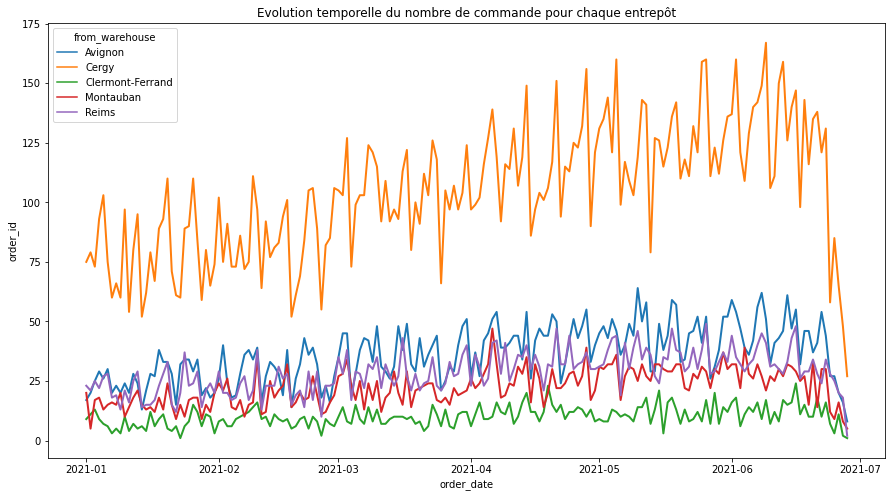

In [56]:
plt.figure(figsize=(15,8))
sns.lineplot(x="order_date", y="order_id", data=orders_number, hue="from_warehouse", linewidth=2)
plt.title("Evolution temporelle du nombre de commande pour chaque entrepôt")